In [1]:
!pip install tensorflow_gpu==1.15

In [2]:
import tensorflow as tf
from tensorboard.plugins.hparams.api import KerasCallback
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

Using TensorFlow backend.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
if __name__ == '__main__':
    data = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = data.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    train_images = train_images.reshape(60000, 28, 28, 1)
    # test_images = np.pad(test_images, ((0,0), (98, 98), (98, 98), (0,0)), mode='constant', constant_values = (0,0))
    # train_images = np.pad(train_images, ((0, 0), (98, 98), (98, 98), (0, 0)), mode='constant', constant_values=(0, 0))

    print(len(train_images))
    print(test_images.shape)

60000
(10000, 28, 28, 1)


In [12]:
    model = keras.Sequential()
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Flatten())
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              51384320  
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(train_images.reshape(60000, 28, 28, 1), train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 624us/sample - loss: 0.3506 - acc: 0.8726
Epoch 2/10
60000/60000 [==============================] - 37s 623us/sample - loss: 0.2153 - acc: 0.9200
Epoch 3/10
60000/60000 [==============================] - 38s 625us/sample - loss: 0.1582 - acc: 0.9417
Epoch 4/10
60000/60000 [==============================] - 38s 626us/sample - loss: 0.1130 - acc: 0.9586
Epoch 5/10
60000/60000 [==============================] - 38s 625us/sample - loss: 0.0831 - acc: 0.9704
Epoch 6/10
60000/60000 [==============================] - 37s 622us/sample - loss: 0.0647 - acc: 0.9772
Epoch 7/10
60000/60000 [==============================] - 37s 624us/sample - loss: 0.0484 - acc: 0.9836
Epoch 8/10
60000/60000 [==============================] - 37s 624us/sample - loss: 0.0383 - acc: 0.9871
Epoch 9/10
60000/60000 [==============================] - 37s 623us/sample - loss: 0.0375 - acc: 0.9883
Epoch 10/10
60000/60000 [================

In [15]:
model.save("vgg16_weights.h5")
weights = model.get_weights()
print(weights)


[array([[[[-1.73783988e-01,  1.44413739e-01, -4.66382802e-02,
           1.77732617e-01,  1.42198130e-01, -3.60971093e-01,
          -1.71617031e-01,  1.93453118e-01,  2.84311354e-01,
          -9.21904370e-02, -1.31267443e-01, -7.96952322e-02,
           5.13253324e-02, -9.30597782e-02, -3.51063609e-01,
          -7.59716183e-02, -1.50966823e-01, -1.02262087e-01,
          -1.24229491e-01, -2.47327849e-01, -5.86320274e-02,
          -3.30532007e-02, -6.91035017e-02, -1.28123015e-01,
           1.09198749e-01, -9.96172428e-03,  1.81875646e-01,
          -6.78332197e-03,  8.26813579e-02, -1.07430279e-01,
           7.37598771e-03, -1.71053469e-01, -2.34389473e-02,
           1.66857123e-01, -7.51126781e-02, -2.60913104e-01,
          -7.78082982e-02, -1.28332123e-01, -2.68656611e-02,
           1.49025083e-01, -9.95621756e-02, -2.27068037e-01,
           2.91648936e-02, -5.83603717e-02, -1.17401570e-01,
           1.12895936e-01, -3.19221392e-02, -2.92522795e-02,
          -2.26784095e-

In [16]:
test_loss, test_acc = model.evaluate(test_images.reshape(10000, 28, 28, 1), test_labels)
print("our accuracy is ", test_acc)


10000/10000 [==============================] - 1s 124us/sample - loss: 0.7174 - acc: 0.9114
our accuracy is  0.9114


TypeError: ignored

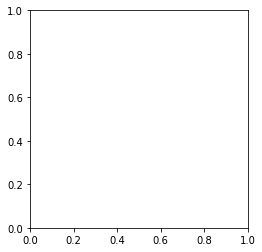

In [17]:
    prediction = model.predict(test_images)
    for i in range(5):
            plot.grid(False)
            plot.imshow(test_images[i], cmap=plot.cm.binary)
            plot.xlabel("Actual: " + class_names[test_labels[i]])
            plot.title("Prediction: " + class_names[np.argmax(prediction[i])])
            plot.show()

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
60000
(10000, 28, 28, 1)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (Ma

TypeError: ignored

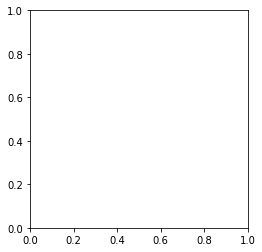

In [2]:
import tensorflow as tf
from tensorboard.plugins.hparams.api import KerasCallback
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

if __name__ == '__main__':
    data = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = data.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    train_images = train_images.reshape(60000, 28, 28, 1)
    # test_images = np.pad(test_images, ((0,0), (98, 98), (98, 98), (0,0)), mode='constant', constant_values = (0,0))
    # train_images = np.pad(train_images, ((0, 0), (98, 98), (98, 98), (0, 0)), mode='constant', constant_values=(0, 0))

    print(len(train_images))
    print(test_images.shape)
    # model = keras.models.load_model('Trail.h5')

    # lets do our architecture
    # sequential is we put our layers in sequence

    model = keras.Sequential()
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Flatten())
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    model.summary()
    # adam and loss function here are standard we may look at these later and how do they work
    # accuracy this is what we want to measure how accurate is our network
    # compile to give the model some parameters

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True,
    #                              save_weights_only=False, mode='auto', period=1)
    # early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
    # hist = model.fit_generator(steps_per_epoch=100, generator=train_images, validation_data=test_images, validation_steps=10,
    #                            epochs=100, callbacks=[checkpoint, early])

    # this is used to train our network check what epochs is in the copybook

    model.fit(train_images.reshape(60000, 28, 28, 1), train_labels, epochs=10)

    # now its time to check how our network works so we will see the accuracy
    test_loss, test_acc = model.evaluate(test_images.reshape(10000, 28, 28, 1), test_labels)
    print("our accuracy is ", test_acc)



    prediction = model.predict(test_images)
    for i in range(5):
            plot.grid(False)
            plot.imshow(test_images[i], cmap=plot.cm.binary)
            plot.xlabel("Actual: " + class_names[test_labels[i]])
            plot.title("Prediction: " + class_names[np.argmax(prediction[i])])
            plot.show()
    model.save("vgg16_weights.h5")
    weights = model.get_weights()
    print(weights)

